<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

**Пожалуйста, не удаляй мои комментарии**, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉


Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

## Сборный проект 2

### Описание проекта

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании.  
Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

Перед нами поставлено две задачи.

Первая задача — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

### Описание предоставленных данных

Нам предоставлено три датасета:  

- Тренировочные выборки:  train_job_satisfaction_rate.csv (первая задача) и train_quit.csv (вторая задача)

- Входные признаки тестовой выборки: test_features.csv (для первой и второй задач)

- Целевые признаки тестовой выборки: test_target_job_satisfaction_rate.csv (первая задача) и test_target_quit.csv (вторая задача)

Предоставленные признаки: 
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate (целевой признак первой задачи) — уровень удовлетворённости сотрудника работой в компании, целевой признак.

- quit (целевой признак второй задачи) - показывает уволился ли сотрудник.

## Загрузка данных

In [1]:
!pip install shap
!pip install phik
!pip install -U scikit-learn -q

In [2]:
import phik
import shap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.inspection import permutation_importance

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
train_data = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', sep=',')
train_data.head(1)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58


In [4]:
test_features = pd.read_csv('/datasets/test_features.csv', sep=',')
test_features.head(1)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800


In [5]:
y_test_data = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', sep=',')
y_test_data.head(1)

,id,job_satisfaction_rate
0,130604,0.74


## Задача №1

### Предобработка данных

#### train_data

Для начала выведем общую информацию о датасете.

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Предоставлены данные по 4000 сотрудникам, сразу бросаются в глаза пропуски в столбцах dept и level, разберемся с ними в пайплайне.

In [7]:
train_data.duplicated().sum()

0

#### test_features

Выведем общую информацию о датасете.

In [8]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


В датасете данные по 2000 сотрудникам с пропусками в dept и level, займемся ими также в пайплайне.

In [9]:
test_features.duplicated().sum()

0

#### y_test_data

In [10]:
y_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [11]:
y_test_data.duplicated().sum()

0

#### Промежуточный вывод.

При первичной предобработке данных дупликатов не обнаружено.
Типы данных в датасетах нас устраивают.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>  
    
С данными познакомились, проведен первичный аналитический осмотр!) Полученная информация поможет нам в дальнейшем с предобработкой данных

### Исследовательский анализ данных

#### train_data

##### id

In [12]:
train_data['id'].nunique()

4000

Действительно четыре тысячи уникальных сотрудников.

##### dept

In [13]:
train_data['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

пропуски обработаем в пайплайне, пока оставим их.

dept
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: id, dtype: int64

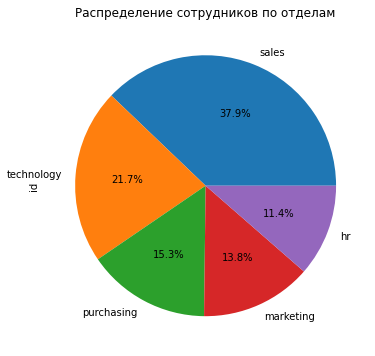

In [14]:
x=train_data.groupby('dept')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Распределение сотрудников по отделам')
x.sort_values(ascending=False)

Самый богатый на сотрудников отдел - продажи, затем идут технические специалисты, отдел покупок, маркетинговый отдел и, наконец, HR.

##### level

In [15]:
train_data['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

снова пропуски

level
junior    1894
middle    1744
sinior     358
Name: id, dtype: int64

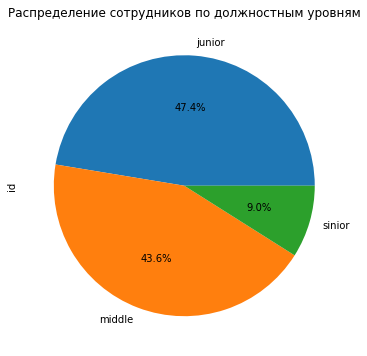

In [16]:
x=train_data.groupby('level')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Распределение сотрудников по должностным уровням')
x.sort_values(ascending=False)

Больше всего джуниоров и миддлов, сеньоров значительно меньше. В целом картина логичная.

##### workload               

In [17]:
train_data['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

workload
medium    2066
low       1200
high       734
Name: id, dtype: int64

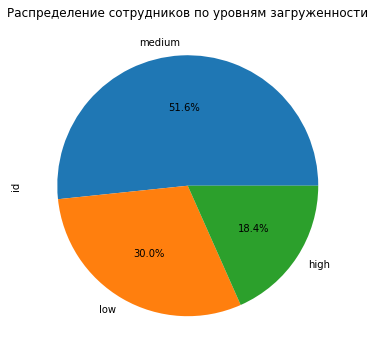

In [18]:
x=train_data.groupby('workload')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Распределение сотрудников по уровням загруженности')
x.sort_values(ascending=False)

Только у половины сотрудников средний уровень загруженности. Остальные либо недорабатавают, либо перерабатывают.

##### employment_years       

In [19]:
train_data['employment_years'].unique()

array([ 2,  1,  4,  7,  9,  6,  3, 10,  8,  5])

In [20]:
years= train_data.groupby('employment_years')['id'].count()

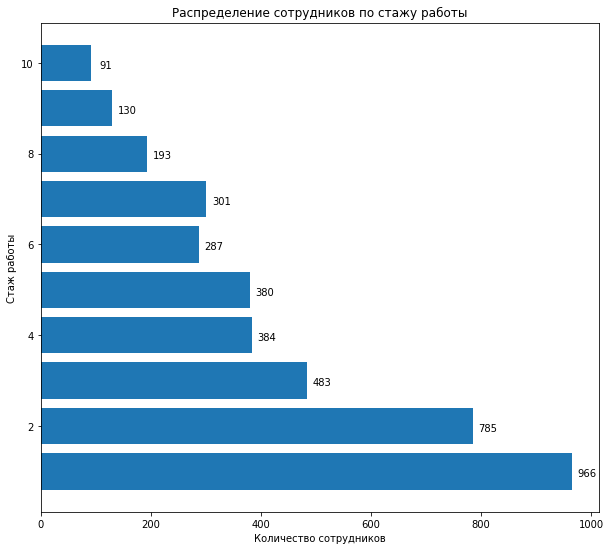

In [21]:
xs = years.index
ys = years

plt.figure(figsize=(10,9));
plt.barh(xs,ys)

for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, 
                 (y,x), 
                 textcoords="offset points", 
                 xytext=(15,-5), 
                 ha='center')
plt.title('Распределение сотрудников по стажу работы')
plt.ylabel('Стаж работы');
plt.xlabel('Количество сотрудников');

Чем больше стаж работы, тем меньше сотрудников. Печально, но правдиво и закономерно.

##### last_year_promo        

In [22]:
train_data['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

last_year_promo
no     3880
yes     120
Name: id, dtype: int64

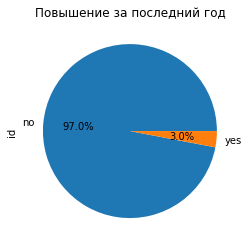

In [23]:
x=train_data.groupby('last_year_promo')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(4,4), autopct='%1.1f%%', legend = False, title = 'Повышение за последний год')
x.sort_values(ascending=False)

Всего 3% (!!!) сотрудников получили повышение за прошедший год, маловато.

##### last_year_violations   

In [24]:
train_data['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

last_year_violations
no     3441
yes     559
Name: id, dtype: int64

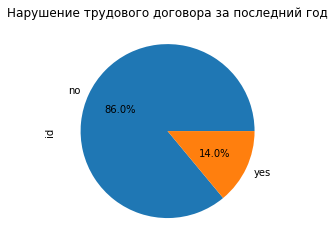

In [25]:
x=train_data.groupby('last_year_violations')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(4,4), autopct='%1.1f%%', legend = False, title = 'Нарушение трудового договора за последний год')
x.sort_values(ascending=False)

14% нарушителей, 86% законопослушных сотрудников.

##### supervisor_evaluation  

In [26]:
train_data['supervisor_evaluation'].unique()

array([1, 5, 2, 3, 4])

supervisor_evaluation
4    1603
3    1263
5     546
2     387
1     201
Name: id, dtype: int64

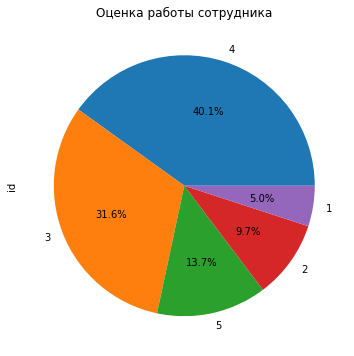

In [27]:
x=train_data.groupby('supervisor_evaluation')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Оценка работы сотрудника')
x.sort_values(ascending=False)

Тут всё как в школе: больше всего хорошистов и троечников, затем идут отличники, ну а остальным неуд и кол!

##### salary                 

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


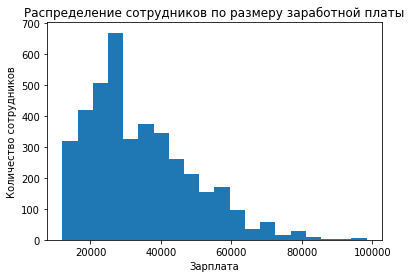

In [28]:
print(train_data['salary'].describe())

ax = train_data['salary'].plot(kind='hist', bins=20)
plt.title('Распределение сотрудников по размеру заработной платы')
ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Зарплата');

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
    
Важно еще поработать над оформлением графика (стандартное правило оформления: должно быть название горизонтальной оси, вертикальной оси и самого графика)
    
    
*Если вдруг в проекте используются графики `SHAP`, то их это правило касается таким же образом. Так как `SHAP` график тоже является визуальным объектом, для его кастомизации мы можем использовать методы plt, как и для других графиков, однако это потребует небольшой настройки самого объекта `SHAP`. Подробнее можно глянуть тут: https://github.com/shap/shap/issues/594.*
    
    
    
**Правило по оформлению графиков касается не только текущего графика, а абсолютно всех графиков в проекте: и одиночных, и сгруппированных, и боксплотов, и  SHAP графиков, и прочих объектов визуализации.**      

<div class="alert alert-info">
<h2> Комментарий студента v.1: <a class="tocSkip"> </h2>
    
Поправил все графики в проекте.

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

средняя зарплата составляет почти 34 тысячи рублей, медианная - 30 тыс. рублей.  
минимальная - всего 12 тыс.! Зато максимальная почти 100 тыс.!

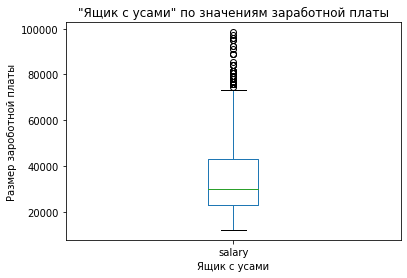

In [29]:
ax = train_data['salary'].plot(kind='box')
plt.title('"Ящик с усами" по значениям заработной платы')
ax.set_ylabel('Размер зароботной платы');
ax.set_xlabel('Ящик с усами');

Скорее всего это не выбросы, а руководящие должности, давайте проверим!

In [30]:
train_data.query('salary > 75000')['level'].value_counts()

sinior    59
Name: level, dtype: int64

Действительно, сеньоры - богачи (эх поскорее бы стать таким....)

##### job_satisfaction_rate  
Целевой признак: оценка удовлетворенности сотрудника

In [31]:
train_data['job_satisfaction_rate'].unique()

array([0.58, 0.76, 0.11, 0.37, 0.2 , 0.78, 0.56, 0.44, 0.14, 0.47, 0.74,
       0.42, 0.32, 0.57, 0.16, 0.69, 0.33, 0.64, 0.39, 0.8 , 0.79, 0.17,
       0.65, 0.18, 0.19, 0.49, 0.63, 0.22, 0.23, 0.5 , 0.35, 0.3 , 0.77,
       0.88, 0.59, 0.21, 0.36, 0.85, 0.7 , 0.48, 0.6 , 0.1 , 0.27, 0.71,
       0.86, 0.54, 0.73, 0.46, 0.31, 0.72, 0.51, 0.61, 0.81, 0.99, 0.15,
       0.91, 0.68, 0.4 , 0.89, 0.67, 0.75, 0.98, 0.26, 0.45, 0.92, 0.82,
       0.66, 0.55, 0.38, 0.53, 0.84, 0.52, 0.24, 0.62, 0.41, 0.28, 0.09,
       0.97, 0.83, 0.25, 0.43, 0.04, 0.13, 0.29, 0.95, 0.93, 0.87, 0.08,
       0.94, 0.07, 0.34, 0.9 , 0.12, 0.06, 0.96, 0.05, 1.  , 0.03])

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


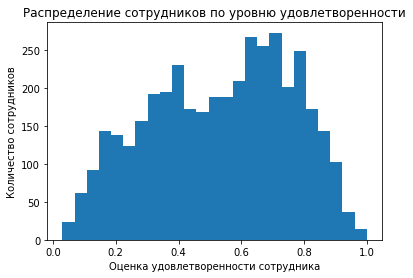

In [32]:
print(train_data['job_satisfaction_rate'].describe())
ax = train_data['job_satisfaction_rate'].plot(kind='hist', bins=25)
plt.title('Распределение сотрудников по уровню удовлетворенности')
ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Оценка удовлетворенности сотрудника');

средняя (0.53) и медианная (0.56) мягко говоря на ахти...  
в целом на графике мы видим, что большинство сотрудников удовлетворены примерно на 0.7.

#### test_features

##### id

In [33]:
test_features['id'].nunique()

2000

Две тысячи уникальных сотрудников!

##### dept

In [34]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

тут у нас и пропуски в значениях и таинственный департамент "пробел".  
Пропуски оставим для пайплайна, пробелы в значениях заменим на nan.

In [35]:
test_features.loc[test_features['dept']==' ', 'dept'] = np.nan
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan],
      dtype=object)

dept
sales         763
technology    455
marketing     279
purchasing    273
hr            227
Name: id, dtype: int64

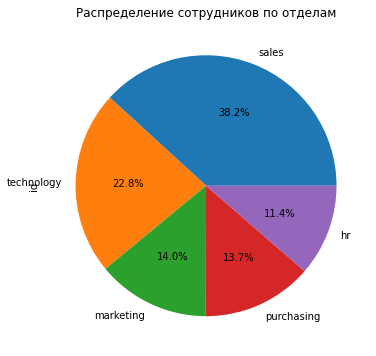

In [36]:
x=test_features.groupby('dept')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Распределение сотрудников по отделам')
x.sort_values(ascending=False)

Всё похоже на тестовые данные, с небольшими отличиями:  
Самый населенный отдел снова продажи, затем снова технические специалисты, маркетинговый отдел (теперь на 3 месте), отдел покупок (опустился на 4 место) и замыкает снова HR.

##### level

In [37]:
test_features['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

снова пропуски

level
junior    974
middle    854
sinior    171
Name: id, dtype: int64

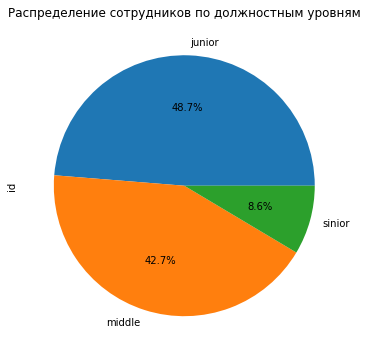

In [38]:
x=test_features.groupby('level')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Распределение сотрудников по должностным уровням')
x.sort_values(ascending=False)

Снова больше всего джуниоров и миддлов, сеньоров меньше всего (даже чуть меньше, чем в тренировочной выборке!).

##### workload               

In [39]:
test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

снова пробелы в значениях, заменим их в пайплайне

workload
medium    1043
low        593
high       363
             1
Name: id, dtype: int64

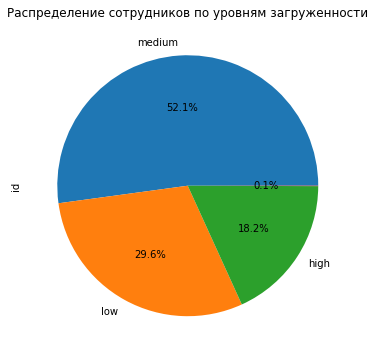

In [40]:
x=test_features.groupby('workload')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Распределение сотрудников по уровням загруженности')
x.sort_values(ascending=False)

Всё как в тренировочной выборке:  
Только у половины сотрудников средний уровень загруженности. Остальные либо недорабатавают, либо перерабатывают.

##### employment_years       

In [41]:
test_features['employment_years'].unique()

array([ 2,  1,  5,  6,  3,  9,  7,  4,  8, 10])

In [42]:
years= test_features.groupby('employment_years')['id'].count()

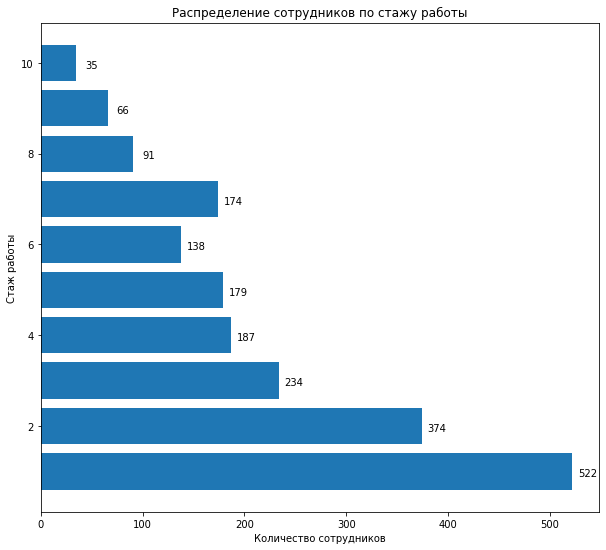

In [43]:
xs = years.index
ys = years

plt.figure(figsize=(10,9));
plt.barh(xs,ys)

for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, 
                 (y,x), 
                 textcoords="offset points", 
                 xytext=(15,-5), 
                 ha='center')
plt.title('Распределение сотрудников по стажу работы')
plt.ylabel('Стаж работы');
plt.xlabel('Количество сотрудников');

картина в целом похожа на тренировочные данные, только вот 7-летних (по стажу) специалистов больше чем 6-летних, возможно 7 лет назад был больше набор? или просто попались стойкие люди.

##### last_year_promo        

In [44]:
test_features['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

last_year_promo
no     1937
yes      63
Name: id, dtype: int64

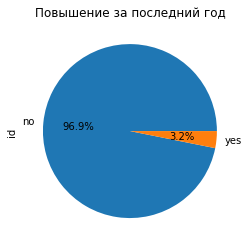

In [45]:
x=test_features.groupby('last_year_promo')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(4,4), autopct='%1.1f%%', legend = False, title = 'Повышение за последний год')
x.sort_values(ascending=False)

И опять всего 3% (!!!) сотрудников получили повышение за прошедший год.

##### last_year_violations   

In [46]:
test_features['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

last_year_violations
no     1738
yes     262
Name: id, dtype: int64

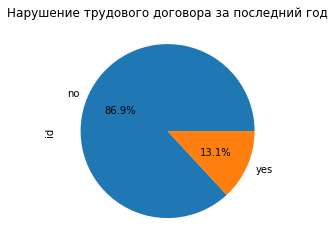

In [47]:
x=test_features.groupby('last_year_violations')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(4,4), autopct='%1.1f%%', legend = False, title = 'Нарушение трудового договора за последний год')
x.sort_values(ascending=False)

13.1% нарушителей (в тренировочной было 14%), 86.9% законопослушных сотрудников.

##### supervisor_evaluation  

In [48]:
test_features['supervisor_evaluation'].unique()

array([5, 4, 3, 1, 2])

supervisor_evaluation
4    857
3    575
5    284
2    196
1     88
Name: id, dtype: int64

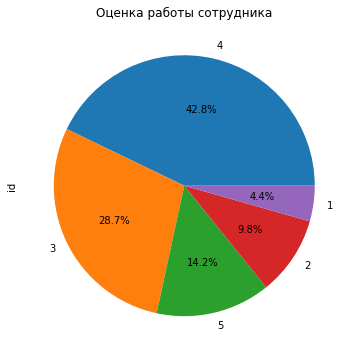

In [49]:
x=test_features.groupby('supervisor_evaluation')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Оценка работы сотрудника')
x.sort_values(ascending=False)

Картина как на тренировочной выборке: больше всего хорошистов и троечников, затем отличники, двоечники и колисты (колиечники? коли?..).

##### salary                 

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


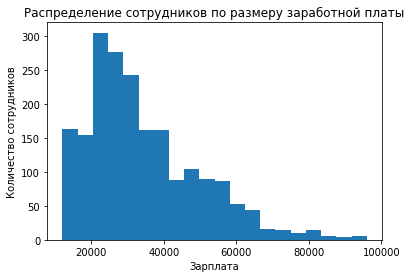

In [50]:
print(test_features['salary'].describe())

ax = test_features['salary'].plot(kind='hist', bins=20)
plt.title('Распределение сотрудников по размеру заработной платы')
ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Зарплата');

средняя зарплата снова почти 34 тысячи рублей, медианная вновь 30 тыс. рублей.  
минимальная - 12 тыс. и максимальная почти 100 тыс.!

#### y_test_data

In [51]:
y_test_data['id'].nunique()

2000

Две тысячи уникальных сотрудников, всё как просили!

##### job_satisfaction_rate

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64


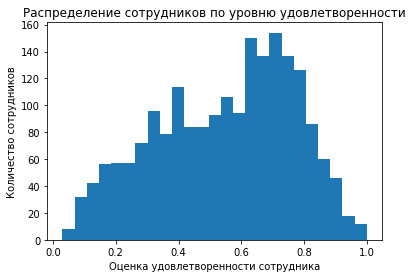

In [52]:
print(y_test_data['job_satisfaction_rate'].describe())
ax = y_test_data['job_satisfaction_rate'].plot(kind='hist', bins=25)
plt.title('Распределение сотрудников по уровню удовлетворенности')
ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Оценка удовлетворенности сотрудника');

Тестовые сотрудники довольнее тренировочных и по среднему (0.55 против 0.53), и по медиане (0.58 против 0.56), и по графику!

#### Промежуточный вывод

При исследовательском анализе данных выявлены пропущенные значения (`nan`) в столбцах `dept` и `level` датасетов `train_data` и `test_features`, их мы оставили для дальнейшей обработки внутри пайплайна.

Также были обнаружены аномальные значения `" "` в столбцах `dept` и `workload` датасета `test_features`, их мы заменили на значение `nan` для дальнейшей обработки в пайплайне. 

В остальном, пропусков, выбросов или аномальных значений не обнаружено.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Мне интересно было изучить проведенный исследовательский анализ данных, твои графики, осмысленный и красочный графический анализ. Найдены очень интересные закономерности)

### Корреляционный анализ

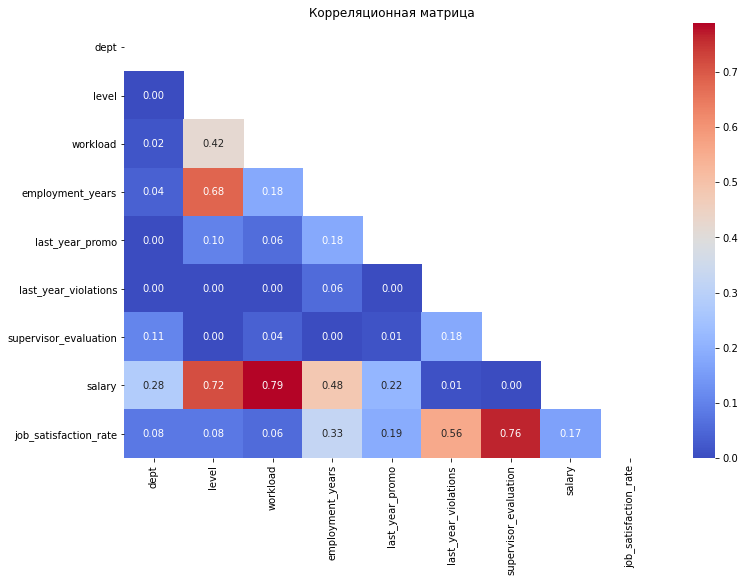

In [53]:
interval_cols = ['salary', 'job_satisfaction_rate']

corr_matrix = train_data.drop('id', axis=1).phik_matrix(interval_cols=interval_cols) 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Корреляционная матрица")
plt.show()

Определяется сильная корреляция между признаками:  
- 0.79 между зарплатой и уровнем нагрузки - это справедливо;
- 0.76 между удовлетворенностью сотрудника и оценкой руководителя (это немного смущает, но возможно и правда - чем больше нравится работа сотруднику, тем лучше он работает);
- 0.72 между зарплатой и должностным уровнем - логично;
- 0.68 между стажем работы и должностным уровнем - тоже ожидаемая картина.

А также умеренная корелляция между признаками:
- 0.56 между удовлетворенностью сотрудника и количеством нарушений за прошедший год (тоже логично - если тебя всё устраивает, то нарушать договоренности с руководством ты не будешь, и наоборот);
- 0.48 между зарплатой и стажем;
- 0.42 между уровнем нагрузки и должностным уровнем (скорее всего - всё делают миддлы, а сеньоры лишь величественно наблюдают за процессом, но это мы еще оценим).

Остальные признаки показывают слабую корреляцию.  
Явной мультиколлинеарности не выявлено.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что проверяешь попарные корреляции признаков)


<br/>
<div class="alert alert-block alert-danger">

    
<b>На доработку🤔:</b> 
    
Согласно документации `phik_matrix` в `interval_cols` нужно передавать только непрерывные признаки, поэтому в методе phik_matrix нужно указать параметр interval_cols, чтобы phik не определял сам численные признаки.
    
**На всякий случай обрати внимание, что `employment_years` и `supervisor_evaluation` - дискретные признаки, их нельзя передавать в `interval_cols`.**   
    
Добавлю, что  `job_satisfaction_rate` и `salary` - это непрерывные признаки     

<div class="alert alert-info">
<h2> Комментарий студента v.1: <a class="tocSkip"> </h2>
    
Добавил intelval_cols ко всем корреляционным матрицам в проекте.

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Пайплайн

#### Подготовка данных

Проверим тренировочные данные на наличие дупликатов после удаления id.

In [54]:
train=train_data.drop(['id'], axis=1)
train.duplicated().sum()

245

Уберем дубликаты.

In [55]:
train = train.drop_duplicates()

Разделим входные и целевой признаки.

In [56]:
X_train = train.drop(['job_satisfaction_rate'], axis=1)
y_train = train['job_satisfaction_rate']

Тестовую выборку сначала соединим, чтобы данные совпадали по id, затем разделим на входные и целевой признаки.

In [57]:
test_data = test_features.merge(y_test_data, on='id')

X_test = test_data.drop(['job_satisfaction_rate', 'id'], axis=1)
y_test = test_data['job_satisfaction_rate']

подготовим списки с признаками

In [58]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

создадим пайплайн для предобработки данных

In [59]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown = 'ignore'))
    ]
    )

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

    
Здесь есть важный момент, связанный с настройкой бесперебойности этого трансформера: по умолчанию у `OneHotEncoder` параметр `handle_unknown` принимает значение `error`, что приведёт к ошибке в случае, если в `test` или другой не-`train` выборке будут такие значения, которых в `train` не было при обучении трансформера. То есть у `OneHotEncoder` нужно задать у параметра `handle_unknown` значение 'ignore'
    
Вероятно, потребуется обновление библиотеки sklearn, чтобы избежать ошибки после установки в `handle_unknown` значения 'ignore'.    

<div class="alert alert-info">
<h2> Комментарий студента v.1: <a class="tocSkip"> </h2>
    
Изменил значение `handle_unknown` на "ignore"

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 


Отлично, что использовано более одного энкодера, взятого из готовой реализации библиотеки sklearn)

Сделаем функцию для подсчета SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение») и метрику с этой функцией. 

In [60]:
def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_pred - y_true) / ((np.abs(y_pred) + np.abs(y_true))/2))

smape_score = make_scorer(smape, greater_is_better=False)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Верно, что задаешь параметр `greater_is_better=False`. Дело в том, что разработчики пакета `sklearn` при создании функций `cross_val_score` и `SearchCV` утвердили соглашение: возвращаемые результаты вычислений данных функций должны соответствовать задаче максимизации (чем большее значение метрики получаем, тем лучше). При этом обратная задача минимизации может быть осуществлена через максимизацию метрики, домноженной на -1. Об этом можно чуть подробнее почитать в документации пакета, правда она на английском. Оставлю <a href = 'https://scikit-learn.org/stable/modules/model_evaluation.html'>ссылку</a>

#### Обучение моделей

Обучим две модели (LinearRegression и DecisionTreeRegressor) и выявим лучшую с перебором гиперпараметров, используя метрику SMAPE.

In [61]:
RANDOM_STATE = 42

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = [{'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
               'models__max_depth': range(5, 15),
               'models__max_features': range(1, min(15, X_train.shape[1] + 1))
              },
              {'models': [LinearRegression()]
    }]

grid = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_score,
    n_jobs=-1)

grid.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика smape_score лучшей модели :', grid.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

Лучшая модель: DecisionTreeRegressor(max_depth=13, max_features=8)

#### Тестирование лучшей модели.

In [62]:
y_pred = grid.best_estimator_.predict(X_test)
print('Метрика smape_score лучшей модели на тестовой выборке:', smape(y_test, y_pred))

Метрика smape_score лучшей модели на тестовой выборке: 14.812612789281237


Замечательно, перед нами был поставлен порог < 15, такая модель нас устраивает!

### Выводы по Задаче №1

Мы выполнили первую задачу: построили модель, которая может предсказать уровень удовлетворённости сотрудника на основе предоставленных данных.

Провели подготовку данных (в том числе удаление скрытых дубликатов в тренировочной выборке), обучение моделей, выбрали лучшую на основе созданной нами метрики (`smape_score`).  

Лучшая модель: `DecisionTreeRegressor(max_depth=13, max_features=8)` с метрикой `smape` на тестовой выборке 14.2

Вероятно дерево решений справилось лучше линейной регрессии из-за большей гибкости в настройке гиперпараметров.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Тестирование лучшей модели проведено правильно. Отлично, что в кросс-валидаторе выше был указан параметр scoring cо sMAPE скорером

## Задача №2

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
В этой задаче по аналогичным заданиям и действиям в проекте -  аналогичные замечания (я их привел выше в первой части проекта).
        
Новые неповторяющиеся замечания будут даны ниже отдельно 

<div class="alert alert-info">
<h2> Комментарий студента v.1: <a class="tocSkip"> </h2>
    
Понял, принял, тут всё тоже поправил

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Загрузка данных

Для тестовых входных признаков используем датасет из первой задачи `test_features`

Помимо этого нам предоставили ещё два датасета: с новыми тренировочными данными (`train_quit`) и с новым тестовым целевым признаком (`y_test_quit`).

In [63]:
train_quit = pd.read_csv('/datasets/train_quit.csv', sep=',')
train_quit.head(1)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no


In [64]:
y_test_quit = pd.read_csv('/datasets/test_target_quit.csv', sep=',')
y_test_quit.head(1)

,id,quit
0,999029,yes


### Предобработка данных

In [65]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [66]:
train_quit.duplicated().sum()

0

Данные по 4000 сотрудникам, без дубликатов.

In [67]:
y_test_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [68]:
y_test_quit.duplicated().sum()

0

данные по 2000 сотрудникам, без явных дубликатов.

#### Промежуточный вывод

Явных дубликатов в данных не выявлено, типы данных в датасетах нас устраивают.

### Исследовательский анализ данных.

#### train_quit

##### id

In [69]:
train_quit['id'].nunique()

4000

Действительно четыре тысячи уникальных сотрудников.

##### dept

In [70]:
train_quit['dept'].unique()

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

dept
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: id, dtype: int64

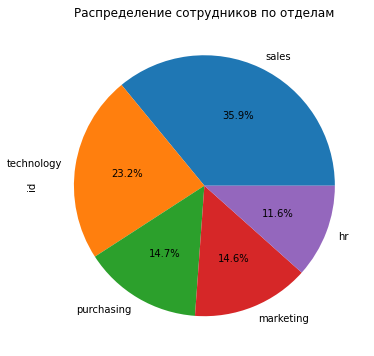

In [71]:
x=train_quit.groupby('dept')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Распределение сотрудников по отделам')
x.sort_values(ascending=False)

Самый богатый на сотрудников отдел - продажи, затем идут технические специалисты, отдел покупок, маркетинговый отдел и, наконец, HR.

##### level

In [72]:
train_quit['level'].unique()

array(['middle', 'junior', 'sinior'], dtype=object)

level
junior    1949
middle    1694
sinior     357
Name: id, dtype: int64

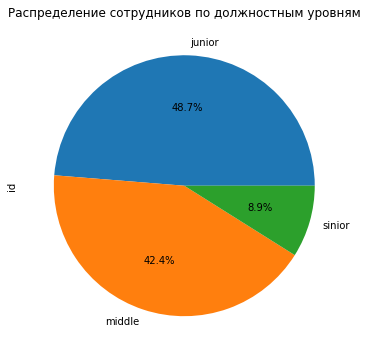

In [73]:
x=train_quit.groupby('level')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Распределение сотрудников по должностным уровням')
x.sort_values(ascending=False)

Больше всего джуниоров и миддлов, сеньоров значительно меньше. 

##### workload               

In [74]:
train_quit['workload'].unique()

array(['high', 'medium', 'low'], dtype=object)

workload
medium    2118
low       1208
high       674
Name: id, dtype: int64

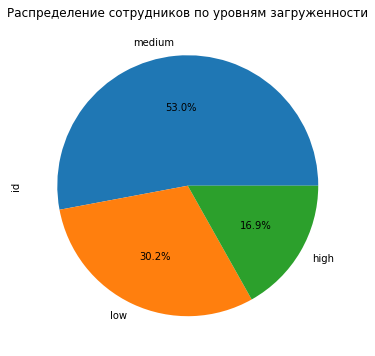

In [75]:
x=train_quit.groupby('workload')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Распределение сотрудников по уровням загруженности')
x.sort_values(ascending=False)

Только у половины сотрудников средний уровень загруженности. Остальные либо недорабатавают, либо перерабатывают.

##### employment_years       

In [76]:
train_quit['employment_years'].unique()

array([ 2,  5,  1,  8,  4,  7,  3,  9,  6, 10])

In [77]:
years= train_quit.groupby('employment_years')['id'].count()

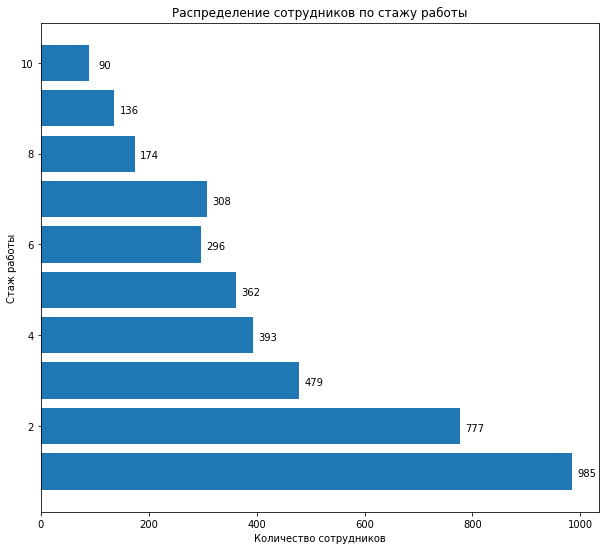

In [78]:
xs = years.index
ys = years

plt.figure(figsize=(10,9));
plt.barh(xs,ys)

for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, 
                 (y,x), 
                 textcoords="offset points", 
                 xytext=(15,-5), 
                 ha='center')
plt.title('Распределение сотрудников по стажу работы')
plt.ylabel('Стаж работы');
plt.xlabel('Количество сотрудников');

Чем больше стаж работы, тем меньше сотрудников. Печально, но правдиво и закономерно.

##### last_year_promo        

In [79]:
train_quit['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

last_year_promo
no     3887
yes     113
Name: id, dtype: int64

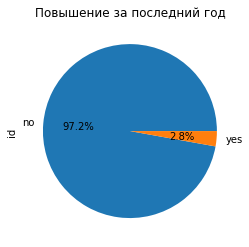

In [80]:
x=train_quit.groupby('last_year_promo')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(4,4), autopct='%1.1f%%', legend = False, title = 'Повышение за последний год')
x.sort_values(ascending=False)

Всего 2.8% (!!!) сотрудников получили повышение за прошедший год, маловато.

##### last_year_violations   

In [81]:
train_quit['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

last_year_violations
no     3455
yes     545
Name: id, dtype: int64

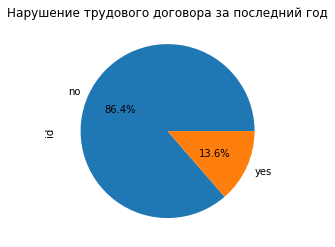

In [82]:
x=train_quit.groupby('last_year_violations')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(4,4), autopct='%1.1f%%', legend = False, title = 'Нарушение трудового договора за последний год')
x.sort_values(ascending=False)

13.6% нарушителей, 86.4% законопослушных сотрудников.

##### supervisor_evaluation  

In [83]:
train_quit['supervisor_evaluation'].unique()

array([4, 1, 3, 5, 2])

supervisor_evaluation
4    1654
3    1233
5     520
2     391
1     202
Name: id, dtype: int64

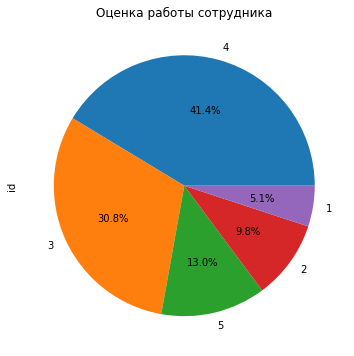

In [84]:
x=train_quit.groupby('supervisor_evaluation')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(6,6), autopct='%1.1f%%', legend = False, title = 'Оценка работы сотрудника')
x.sort_values(ascending=False)

Тут всё как в тренировочной выборке первой задачи.

##### salary                 

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


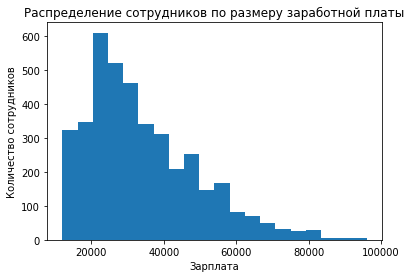

In [85]:
print(train_quit['salary'].describe())

ax = train_quit['salary'].plot(kind='hist', bins=20)
plt.title('Распределение сотрудников по размеру заработной платы')
ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Зарплата');

средняя зарплата составляет почти 34 тысячи рублей, медианная - 30 тыс. рублей.  
минимальная - всего 12 тыс.! Зато максимальная почти 100 тыс.!

##### quit
Новый целевой признак: увольнение сотрудника из компании.

quit
no     2872
yes    1128
Name: id, dtype: int64

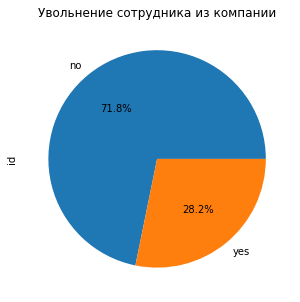

In [86]:
x=train_quit.groupby('quit')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(5,5), autopct='%1.1f%%', legend = False, title = 'Увольнение сотрудника из компании')
x.sort_values(ascending=False)

28.2% сотрудников из предоставленного датасета больше не работают в компании, 71.8% сохранили работу.

#### y_test_quit

##### id

In [87]:
y_test_quit['id'].nunique()

2000

Данные по 2000 сотрудникам.

##### quit

quit
no     1436
yes     564
Name: id, dtype: int64

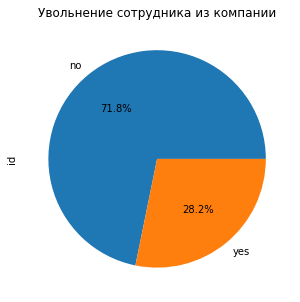

In [88]:
x=y_test_quit.groupby('quit')['id'].count()

x.sort_values(ascending=False).plot(kind='pie', y='id', figsize=(5,5), autopct='%1.1f%%', legend = False, title = 'Увольнение сотрудника из компании')
x.sort_values(ascending=False)

28.2% сотрудников из тестового датасета больше не работают в компании, 71.8% сохранили работу. Соотношение точь-в-точь как на тренировочных данных.

#### Промежуточный вывод

При исследовательском анализа новых датасетов пропусков, выбросов или аномальных значений не обнаружено.

### "Портрет" уволившегося сотрудника

Для этого сравним признаковые описания уволившихся сотрудников и оставшихся по входным признакам.

Сначала разделим их на два датасета, для дальнейшего удобства.

In [89]:
quit_df = train_quit.query('quit == "yes"')
no_quit_df = train_quit.query('quit == "no"')

#### dept

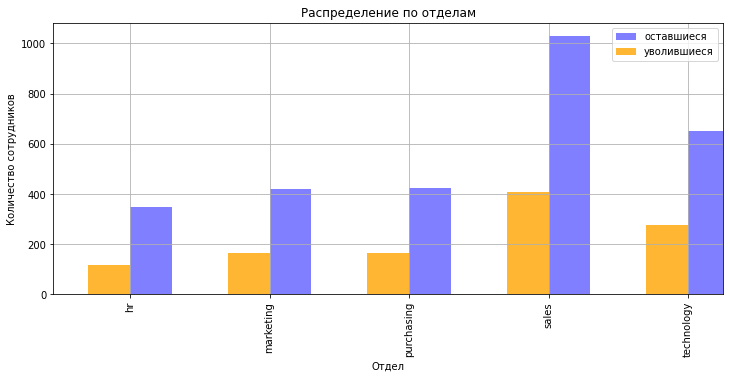

In [90]:
ax = no_quit_df.groupby('dept')['id'].count().plot(
    kind='bar',
    y='id',
    figsize=(12,5),
    alpha=0.5,
    width=0.3,
    color='blue',
    position = 0,
    label='оставшиеся',
    title = 'Распределение по отделам',
    legend=True
)
quit_df.groupby('dept')['id'].count().plot(
    kind='bar',
    y='id',
    alpha=0.8,
    width=0.3,
    color='orange',
    position = 1,
    label='уволившиеся',
    ax=ax,
    grid=True,
    legend=True,
);

ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Отдел');

Чаще всего увольняются из отдела продаж (но там и больше всего сотрудников), затем из тех.отдела (второй отдел по количеству сотрудников). Реже всего увольняются из HR отдела (но там и меньше всего сотрудников).  
На графике видно, что в каждом отдела почти треть сотрудников увольняется, без каких-либо предпочтений и явных закономерностей. 

Оценим доли уволившихся сотрудников по отделам.

In [91]:
quit_dept = train_quit.groupby('dept')['quit'].value_counts().unstack(fill_value=0)
quit_dept['quit_rate'] = quit_dept['yes'] / (quit_dept['yes'] + quit_dept['no'])

quit_dept = quit_dept.sort_values(by='quit_rate', ascending=False)
quit_dept

quit,no,yes,quit_rate
dept,,,
technology,652,276,0.297414
sales,1031,407,0.283032
purchasing,422,166,0.282313
marketing,419,163,0.280069
hr,348,116,0.250000


Самая большая доля уволившихся сотрудников в отделе technology - 29.7%, самая низная доля в отделе HR 25%. В общем разброс совсем небольшой, не то чтобы в каком-то отделе особо чаще происходят увольнения.

#### level

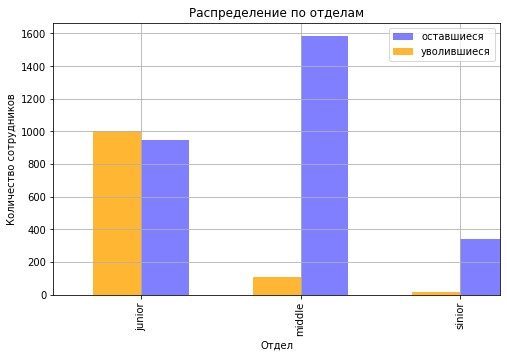

In [92]:
ax = no_quit_df.groupby('level')['id'].count().plot(
    kind='bar',
    y='id',
    figsize=(8,5),
    alpha=0.5,
    width=0.3,
    color='blue',
    position = 0,
    label='оставшиеся',
    title = 'Распределение по отделам',
    legend=True
)
quit_df.groupby('level')['id'].count().plot(
    kind='bar',
    y='id',
    alpha=0.8,
    width=0.3,
    color='orange',
    position = 1,
    label='уволившиеся',
    ax=ax,
    grid=True,
    legend=True,
);

ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Отдел');

Ожидаемая картина: чаще всего увольняются джуны, т.к. далеко не все выдерживают новую работу (или условия труда, например, зарплату и уровень нагрузки) на начальных этапах. Зато уже на стадии миддл количество увольняющихся сотрудников значительно меньше, а сеньоры вообще практически не увольняются (ещё бы, вы видели их зарплаты??).

Оценим доли уволившихся сотрудников по должностному уровню.

In [93]:
quit_level = train_quit.groupby('level')['quit'].value_counts().unstack(fill_value=0)
quit_level['quit_rate'] = quit_level['yes'] / (quit_level['yes'] + quit_level['no'])

quit_level = quit_level.sort_values(by='quit_rate', ascending=False)
quit_level

quit,no,yes,quit_rate
level,,,
junior,946,1003,0.514623
middle,1586,108,0.063754
sinior,340,17,0.047619


Самая большая доля уволившихся сотрудников среди джуниоров - 51%, среди миддлов - 6%, среди сеньоров - 5%.

#### workload

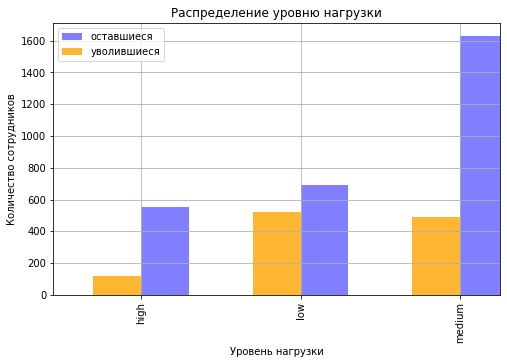

In [94]:
ax = no_quit_df.groupby('workload')['id'].count().plot(
    kind='bar',
    y='id',
    figsize=(8,5),
    alpha=0.5,
    width=0.3,
    color='blue',
    position = 0,
    label='оставшиеся',
    title = 'Распределение уровню нагрузки',
    legend=True
)
quit_df.groupby('workload')['id'].count().plot(
    kind='bar',
    y='id',
    alpha=0.8,
    width=0.3,
    color='orange',
    position = 1,
    label='уволившиеся',
    ax=ax,
    grid=True,
    legend=True,
);

ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Уровень нагрузки');

Чаще всего увольняются на низком и среднем уровнях нагрузки. Кто же это? Конечно, джуны!   

При этом на большом уровне нагрузки увольняются значительно меньше (спойлер - чем больше нагрузка, тем больше и зарплата).

Оценим доли уволившихся сотрудников по уровню нагрузки.

In [95]:
quit_load = train_quit.groupby('workload')['quit'].value_counts().unstack(fill_value=0)
quit_load['quit_rate'] = quit_load['yes'] / (quit_load['yes'] + quit_load['no'])

quit_load = quit_load.sort_values(by='quit_rate', ascending=False)
quit_load

quit,no,yes,quit_rate
workload,,,
low,689,519,0.429636
medium,1630,488,0.230406
high,553,121,0.179525


Самая большая доля уволившихся сотрудников среди сотрудников с низкой нагрузкой - 43%, доля среди сотрудников со средней нагрузкой - 23%, с высокой нагрузкой - 18%.

#### employment_years

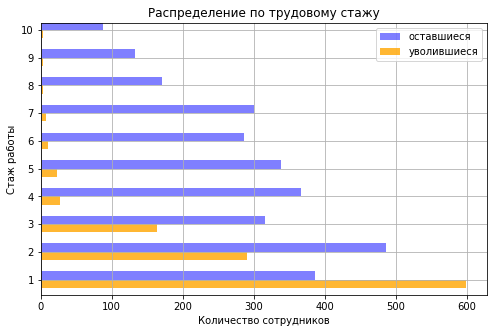

In [96]:
ax = no_quit_df.groupby('employment_years')['id'].count().plot(
    kind='barh',
    y='id',
    figsize=(8,5),
    alpha=0.5,
    width=0.3,
    color='blue',
    position = 0,
    label='оставшиеся',
    title = 'Распределение по трудовому стажу',
    legend=True
)
quit_df.groupby('employment_years')['id'].count().plot(
    kind='barh',
    y='id',
    alpha=0.8,
    width=0.3,
    color='orange',
    position = 1,
    label='уволившиеся',
    ax=ax,
    grid=True,
    legend=True,
);

ax.set_ylabel('Стаж работы');
ax.set_xlabel('Количество сотрудников');

Ожидаемо больше всего увольнений на первом году работы, и дальше по убывающей.  

После трех лет работы, процент увольнений гораздо меньше. Делаем вывод - срок "закалки" специалиста три года.

Оценим доли уволившихся сотрудников по стажу работы.

In [97]:
quit_years = train_quit.groupby('employment_years')['quit'].value_counts().unstack(fill_value=0)
quit_years['quit_rate'] = quit_years['yes'] / (quit_years['yes'] + quit_years['no'])

quit_years = quit_years.sort_values(by='quit_rate', ascending=False)
quit_years

quit,no,yes,quit_rate
employment_years,,,
1,386,599,0.608122
2,487,290,0.373230
3,316,163,0.340292
4,366,27,0.068702
5,339,23,0.063536
6,286,10,0.033784
10,87,3,0.033333
7,301,7,0.022727
9,133,3,0.022059


На первом году увольняется 61% сотрудников, на втором - 37%, на третьем - 34%; на четвертом году резкое снижение до 7%, а на десятый год работы доля уволившихся уже меньше 2%

#### last_year_promo 

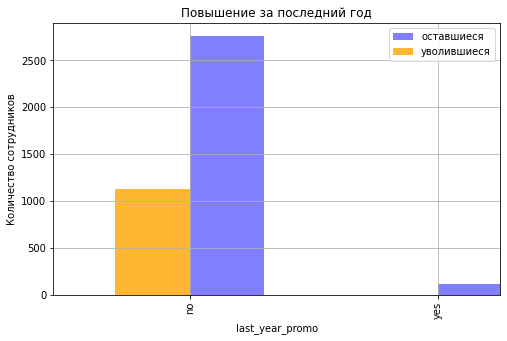

In [98]:
ax = no_quit_df.groupby('last_year_promo')['id'].count().plot(
    kind='bar',
    y='id',
    figsize=(8,5),
    alpha=0.5,
    width=0.3,
    color='blue',
    position = 0,
    label='оставшиеся',
    title = 'Повышение за последний год',
    legend=True
)
quit_df.groupby('last_year_promo')['id'].count().plot(
    kind='bar',
    y='id',
    alpha=0.8,
    width=0.3,
    color='orange',
    position = 1,
    label='уволившиеся',
    ax=ax,
    grid=True,
    legend=True,
);

ax.set_ylabel('Количество сотрудников');

Никого из уволившихся сотрудников не повышали за прошедший год (учитывая, что всего ~ 3% сотрудников добились повышения, это ожидаемо).

#### last_year_violations

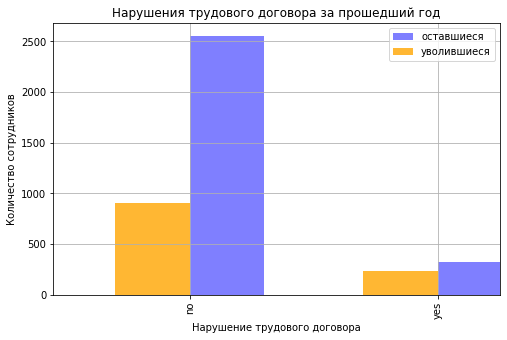

In [99]:
ax = no_quit_df.groupby('last_year_violations')['id'].count().plot(
    kind='bar',
    y='id',
    figsize=(8,5),
    alpha=0.5,
    width=0.3,
    color='blue',
    position = 0,
    label='оставшиеся',
    title = 'Нарушения трудового договора за прошедший год',
    legend=True
)
quit_df.groupby('last_year_violations')['id'].count().plot(
    kind='bar',
    y='id',
    alpha=0.8,
    width=0.3,
    color='orange',
    position = 1,
    label='уволившиеся',
    ax=ax,
    grid=True,
    legend=True,
);

ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Нарушение трудового договора');

Чаще всего увольняющиеся не нарушают договор. Однако почти половина из тех, кто нарушил, потом увольняются.

#### supervisor_evaluation

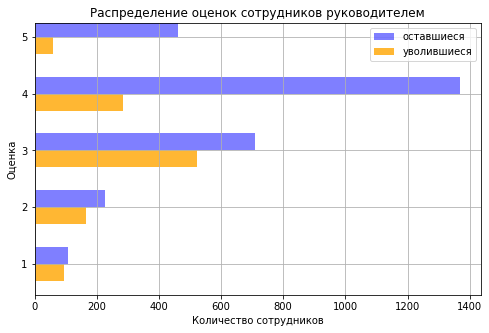

In [100]:
ax = no_quit_df.groupby('supervisor_evaluation')['id'].count().plot(
    kind='barh',
    y='id',
    figsize=(8,5),
    alpha=0.5,
    width=0.3,
    color='blue',
    position = 0,
    label='оставшиеся',
    title = 'Распределение оценок сотрудников руководителем',
    legend=True
)
quit_df.groupby('supervisor_evaluation')['id'].count().plot(
    kind='barh',
    y='id',
    alpha=0.8,
    width=0.3,
    color='orange',
    position = 1,
    label='уволившиеся',
    ax=ax,
    grid=True,
    legend=True,
);

ax.set_ylabel('Оценка');
ax.set_xlabel('Количество сотрудников');

Уволившихся сотрудников чаще всего оценивали на "троечку", немного реже на "хорошо". Оценок "отлично" среди уволившихся даже меньше, чем оценок "кол".

Оценим доли уволившихся сотрудников в зависимости от полученной оценки.

In [101]:
quit_score = train_quit.groupby('supervisor_evaluation')['quit'].value_counts().unstack(fill_value=0)
quit_score['quit_rate'] = quit_score['yes'] / (quit_score['yes'] + quit_score['no'])

quit_score = quit_score.sort_values(by='quit_rate', ascending=False)
quit_score

quit,no,yes,quit_rate
supervisor_evaluation,,,
1,107,95,0.470297
3,710,523,0.424169
2,227,164,0.419437
4,1368,286,0.172914
5,460,60,0.115385


Почти половина сотрудников (47%) получивших единицу увольняются (значит ещё половина осталась в компании? безобразие); уволилось 42% троечников и 42% двоечников; также компания потеряла 17% хорошистов и почти 12% отличников.

#### salary

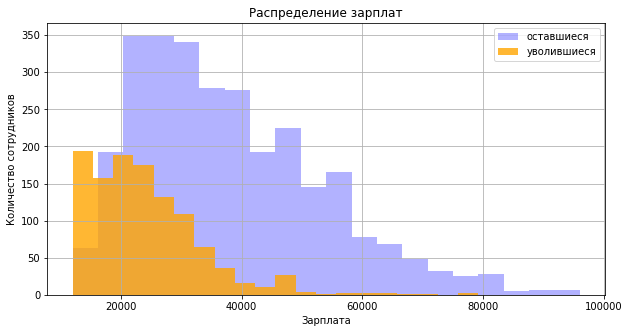

In [102]:
ax = no_quit_df.plot(
    kind='hist',
    y='salary',
    figsize=(10,5),
    bins=20,
    alpha=0.3,
    color = 'blue',
    label='оставшиеся',
    title = 'Распределение зарплат'
)
quit_df.plot(
    kind='hist',
    y='salary',
    bins=20,
    alpha=0.8,
    color='orange',
    label='уволившиеся',
    ax=ax,
    grid=True,
    legend=True,
);

ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Зарплата');

По графику видно, что зарплаты уволившихся сотрудников действительно сильно уступают зарплатам оставшихся, не будем забывать, что большинство уволившихся - джуны, поэтому это вполне закономерно. Давайте сравним в абсолютных значениях.

In [103]:
quit_df['salary'].describe()

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64

In [104]:
no_quit_df['salary'].describe()

count     2872.000000
mean     37702.228412
std      15218.977339
min      12000.000000
25%      25200.000000
50%      34800.000000
75%      46800.000000
max      96000.000000
Name: salary, dtype: float64

Средняя зарплата уволившегося сотрудника - 24 тыс. (против 38 тыс. у оставшегося работника).  
Медианная зарплата уволившегося сотрудника - 23 тыс. (против 35 тыс. у оставшегося работника).

Действительно сильно меньше, чем у оставшихся.

Посмотрим также распределение плотности на графике `sns.kdeplot`

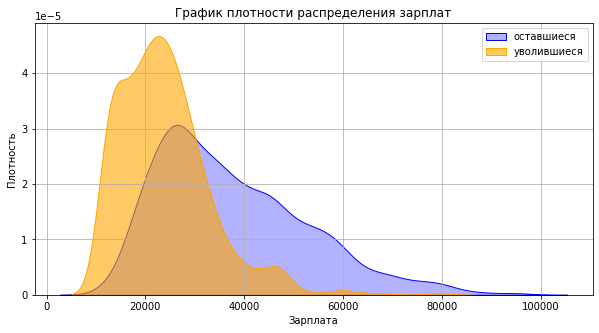

In [105]:
plt.figure(figsize=(10, 5))

sns.kdeplot(data=no_quit_df, x='salary', fill=True, color='blue', alpha=0.3, label='оставшиеся')

sns.kdeplot(data=quit_df, x='salary', fill=True, color='orange', alpha=0.6, label='уволившиеся')

plt.title('График плотности распределения зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)

plt.show()

На графике плотности также видим, что зарплаты уволившихся ниже, чем у оставшихся.

#### Промежуточный вывод

Если описать среднего уволившегося сотрудника одним предложением, то это:  
Джуниор на 1-3 году работы с низкой нагрузкой, с маленькой зарплатой, оцениваемый руководителем на 3/5.  

Кажется, потеря невелика.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Нужно еще использовать относительные значения в описании портрета уволившегося сотрудника, прописать долю ушедших сотрудников.
    
Например: 2000 работают в отделе hr и 200 из них уволилось, доля ушедших — 0.1; 300 работают в продажах и 150 из них уволилось, доля ушедших — 0.5. Важна именно доля  
    
Обрати также внимание, что если любой из признаков анализируется в разрезе признака `quit` - тут работает тот же принцип, что в задании `3.3`, когда непрерывная величина анализируется в разрезе целевого признака - обязательно нужно применять нормированную гистограмму для нивелирования разницы размера выборок. 
    
То есть нужно использовать графики плотности или kde вместо гистограмм частотности (по оси У доля относительно датасета вместо абсолютного количества). Наличие либо отсутствие разницы будет более очевидным.  Рекомендую тебе нормализовать гистограммы, используя метод `sns.kdeplot`   

<div class="alert alert-info">
<h2> Комментарий студента v.1: <a class="tocSkip"> </h2>
    
Добавил график `sns.kdeplot` в пункт к зарплате.
Также рассчитал (в соответствующих пунктах) долю уволившихся сотрудников по отделам, должностному уровню, уровню нагрузки, стажу и по оценкам работодателя. 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Связь увольнения и оценки удовлетворенности работой
Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение.

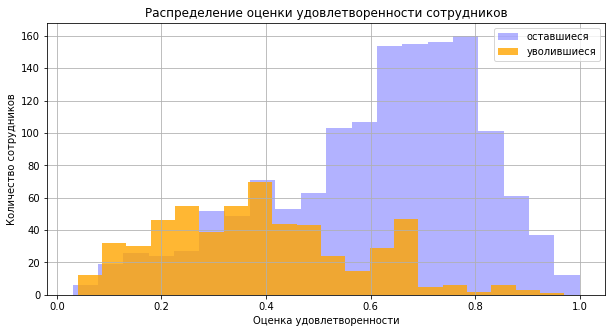

In [106]:
df_y = y_test_data.merge(y_test_quit, on='id')

ax = df_y.query('quit == "no"').plot(
    kind='hist',
    y='job_satisfaction_rate',
    figsize=(10,5),
    bins=20,
    alpha=0.3,
    color = 'blue',
    label='оставшиеся',
    title = 'Распределение оценки удовлетворенности сотрудников'
)
df_y.query('quit == "yes"').plot(
    kind='hist',
    y='job_satisfaction_rate',
    bins=20,
    alpha=0.8,
    color='orange',
    label='уволившиеся',
    ax=ax,
    grid=True,
    legend=True,
);

ax.set_ylabel('Количество сотрудников');
ax.set_xlabel('Оценка удовлетворенности');

In [107]:
df_y.query('quit == "yes"')['job_satisfaction_rate'].describe()

count    564.000000
mean       0.387713
std        0.185784
min        0.040000
25%        0.240000
50%        0.370000
75%        0.492500
max        0.970000
Name: job_satisfaction_rate, dtype: float64

In [108]:
df_y.query('quit == "no"')['job_satisfaction_rate'].describe()

count    1436.000000
mean        0.612040
std         0.199367
min         0.030000
25%         0.500000
50%         0.660000
75%         0.760000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

Действительно, связь очевидна, оставшиеся сотрудники гораздо довольнее уволившихся. По медиане уволившиеся довольны на 0.37, оставшиеся на 0.66.

Посмотрим также распределение на графике плотности.

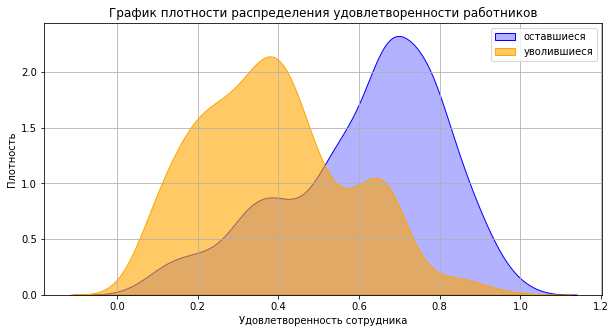

In [109]:
plt.figure(figsize=(10, 5))

sns.kdeplot(data=df_y.query('quit == "no"'), x='job_satisfaction_rate', fill=True, color='blue', alpha=0.3, label='оставшиеся')

sns.kdeplot(data=df_y.query('quit == "yes"'), x='job_satisfaction_rate', fill=True, color='orange', alpha=0.6, label='уволившиеся')

plt.title('График плотности распределения удовлетворенности работников')
plt.xlabel('Удовлетворенность сотрудника')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)

plt.show()

Тоже видим явную тенденцию к более низким оценкам удовлетворенности у уволившихся сотрудников.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
нужно использовать графики плотности или kde вместо гистограмм частотности (по оси У доля относительно датасета вместо абсолютного количества). Наличие либо отсутствие разницы будет более очевидным.  Рекомендую тебе нормализовать гистограммы, используя метод `sns.kdeplot`   

<div class="alert alert-info">
<h2> Комментарий студента v.1: <a class="tocSkip"> </h2>
    
Добавил.

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Добавление нового признака

Добавим столбец с оценками удовлетворенности сотрудников, предсказанными нашей лучшей моделью, в новый тренировочный датасет. 

In [110]:
train_quit['job_satisfaction_rate'] = grid.best_estimator_.predict(train_quit.drop(['id', 'quit'], axis=1))

В датасете со входными признаками для второй задачи (тот же датасет что и в первой задачи) столбец с удовлетворённостью сотрудников мы можем заполнить истинными значениями из датасета с целевым признаком первой задачи (y_test_data).

In [111]:
test_features = test_features.merge(y_test_data, on='id')
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75


### Корреляционный анализ

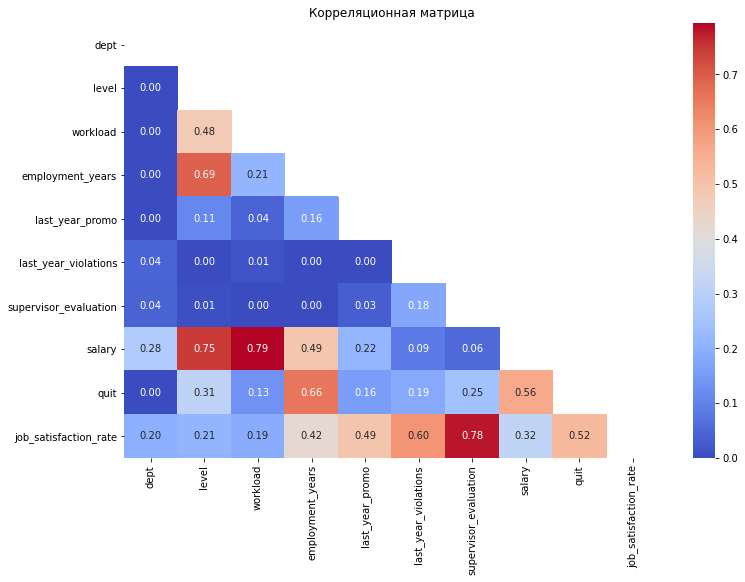

In [112]:
interval_cols = ['salary', 'job_satisfaction_rate']

corr_matrix = train_quit.drop('id', axis=1).phik_matrix(interval_cols=interval_cols) 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Корреляционная матрица")
plt.show()

Явной мультиколлинеарности не видим. Будем использовать все признаки.

### Пайплайн

#### Подготовка данных

Проверим тренировочные данные на наличие дупликатов после удаления id.

In [113]:
train=train_quit.drop(['id'], axis=1)
train.duplicated().sum()

1413

Уберем дубликаты.

In [114]:
train = train.drop_duplicates()

Разделим входные и целевой признаки.

In [115]:
X_train = train.drop(['quit'], axis=1)
y_train = train['quit']

Тестовую выборку сначала соединим, чтобы данные совпадали по id, затем разделим на входные и целевой признаки.

In [116]:
test_data = test_features.merge(y_test_quit, on='id')

X_test = test_data.drop(['quit', 'id'], axis=1)
y_test = test_data['quit']

Закодируем целевой признак.

In [117]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test1 = label_encoder.transform(y_test)

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что для кодирования таргета применяется label encoder  

подготовим списки с признаками

In [118]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

создадим пайплайн для предобработки данных

In [119]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown = 'ignore'))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Для оценки работы моделей будем использовать универсальную метрику - ROC-AUC.

#### Обучение моделей

Обучим четыре модели (LogicticRegression, KNeighborsClassifier, SVC и DecisionTreeClassifier) и выявим лучшую.

In [120]:
RANDOM_STATE = 42

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [{'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
               'models__max_depth': range(5, 10),
               'models__max_features': range(1, min(15, X_train.shape[1] + 1)),
               'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
              {'models': [KNeighborsClassifier()],
               'models__n_neighbors': range(2,5),
               'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
              {'models': [SVC(random_state=RANDOM_STATE, probability=True)],
               'models__degree': range(2, 8),
               'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
              {'models': [LogisticRegression(random_state=RANDOM_STATE,
                                             solver='liblinear', 
                                             penalty='l1')],
               'models__C': range(1,5),
               'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }]

grid_2 = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1)

grid_2.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_2.best_estimator_)
print ('Метрика ROC-AUC лучшей модели :', grid_2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

Лучшая модель: LogisticRegression(C=4, penalty='l1', solver='liblinear')

#### Тестирование лучшей модели.

In [121]:
print('Метрика ROC-AUC лучшей модели на тестовой выборке:', roc_auc_score(y_test, grid_2.predict_proba(X_test)[:, 1]))

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9076939983010331


Хороший результат, лучше чем на тренировочной выборке, но для порога установленного заказчиком (>0.91) нам недостаточно!

#### Улучшаем модель

Посмотрим на значимость признаков для модели и отсеим малозначительные признаки.

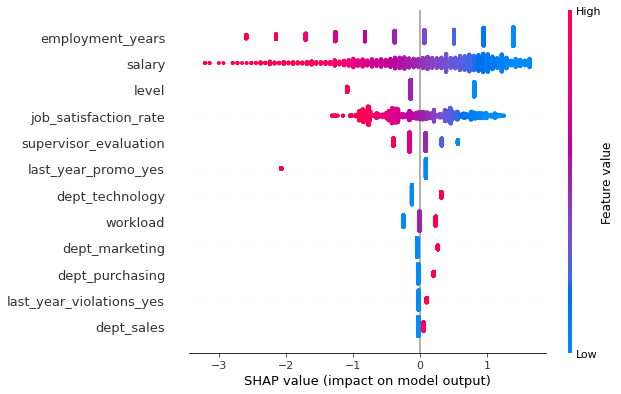

In [122]:
best_model = grid_2.best_estimator_
preprocessor = best_model.named_steps['preprocessor']

ord_feature_names = ord_columns  
num_feature_names = num_columns 
ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(ohe_columns)

all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])

X_train_preprocessed = preprocessor.transform(X_train)

X_train_transformed = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)

explainer = shap.LinearExplainer(best_model.named_steps['models'], X_train_transformed)

shap_values = explainer(X_train_transformed)

shap.plots.beeswarm(shap_values, max_display=20)

Видим, что значения столбцов dept и last_year_violation вносят незначительный вклад в модель (мы это заметили ещё на этапе исследовательского анализа). Попробуем их убрать. Посмотрим, что получится.

In [123]:
X_train2 = X_train.drop(['dept', 'last_year_violations'], axis=1)
X_test2 = X_test.drop(['dept', 'last_year_violations'], axis=1)

In [124]:
ohe_columns = ['last_year_promo']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [125]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown = 'ignore'))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [126]:
RANDOM_STATE = 42

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [{'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
               'models__max_depth': range(5, 10),
               'models__max_features': range(1, min(15, X_train2.shape[1] + 1)),
               'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
              {'models': [KNeighborsClassifier()],
               'models__n_neighbors': range(2,5),
               'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
              {'models': [SVC(random_state=RANDOM_STATE, probability=True)],
               'models__degree': range(2, 8),
               'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
              {'models': [LogisticRegression(random_state=RANDOM_STATE,
                                             solver='liblinear', 
                                             penalty='l1')],
               'models__C': range(1,5),
               'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }]

grid_2 = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1)

grid_2.fit(X_train2, y_train)

print('Лучшая модель и её параметры:\n\n', grid_2.best_estimator_)
print ('Метрика ROC-AUC лучшей модели :', grid_2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['last_year_promo']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
         

Лучшая модель в этот раз: DecisionTreeClassifier(max_depth=5, max_features=3)

#### Повторное тестирование лучшей модели.

In [127]:
print('Метрика ROC-AUC лучшей модели на тестовой выборке:', roc_auc_score(y_test, grid_2.predict_proba(X_test2)[:, 1]))

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9150343744443785


Замечательно, результат на тестовой выборке (0.915) наконец нас устраивает!

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
На тестовой выборке получено хорошее качество) Отлично, что в кросс-валидаторе выше в параметре scoring был задан 'roc_auc'

### Итоговый вывод.

Перед нами были поставлены две задачи:   
- построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
- построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Пам были даны в общей сумме 5 датасетов с данными. Была проведена их предобработка, исследовательский анализ, добаdление новых столбцов (для второй задачи), была выявлена высокая связь низкой оценки удовлетворенности сотрудника и фактом увольнения, а также мы описали "портрет" уволившегося сотрудника:
- джуниор на 1-3 году работы с маленькой нагрузкой, с маленькой зарплатой, оцениваемый руководителем на 3/5.

На основе предоставленных данных были обучены:
- для первой задачи две модели (LinearRegression, DecisionTreeRegressor), которые оценивались метрикой SMAPE; по результатам обучения была выявлена лучшая модель `DecisionTreeRegressor(max_depth=13, max_features=8)` с результатом SMAPE на тестовой выборке - `14.8`;
- для второй задачи четыре модели (LogicticRegression, KNeighborsClassifier, SVC и DecisionTreeClassifier), которые оценивались универсальной метрикой ROC-AUC; по результатам обучения и отсеивания малозначитлеьных признаков (dept, last_year_violation) была выявлена  лучшая модель `DecisionTreeClassifier(max_depth=5, max_features=3)` с результатом ROC-AUC на тестовой выборке - `0.915`.

Можно порекомендовать заказчику ряд мер для того, чтобы сотрудники меньше увольнялись:  
- нужно пристально следить за их удовлетворенностью работой и при её снижении, оказывать сотруднику поддержку (моральную или в виде каких-то бонусов/тренингов);
- давать джуниорам больше нагрузки, что даст им больше опыта, уверенности в своих силах, а также увеличит зарплату!
- или просто поднять всем джунам зарплату!

Также было бы интересно более пристально собрать информацию от джуниоров, чтобы выявить другие возможные причины увольнения, например, уровень поддержки (и помощи) старших товарищей; уровень интереса и вовлеченности в работу. Наверняка эти данные есть у отдела HR, можно попросить их поделиться.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
В итоговый вывод нужно добавить рекомендации для бизнеса. Поправь, пожалуйста



<div class="alert alert-info">
<h2> Комментарий студента v.1: <a class="tocSkip"> </h2>
    
Добавил.

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

 <div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера (общий вывод по проекту) <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с этим проектом. Молодец! Подготовлены данные для анализа, изучен каждый параметр. Все красиво визуализировано, построено несколько моделей регрессии/ классификации и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались  функции, помогающие избавиться от дублирования кода;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использованы пайплайны, кросс-валидация и поиск гиперпараметров.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера 2 (итоговый вывод по проекту) <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально. Принимаю работу)
    
Если хочешь лучше разобраться в ML, то могу посоветовать тебе: 
    
- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/   
    
- Книжка от ШАД: https://academy.yandex.ru/handbook/ml/
    
- Также рекомендую лекции от Andrew Ng: https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN
- Избежать утечки данных при кросс-валидации тебе поможет <a href="https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f">конвеерная обработка данных</a>.     
    
- Не все признаки приносят пользу при моделировании. Инструмент <a href="https://proglib.io/p/feature-selector">FeatureSelector</a> поможет тебе отобрать важные признаки и избавит от ручной обработки.  Также можешь посмотреть статью на <a href="https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook">Kaggle</a> (она сложнее).    
    
    
В этом проекте были отработаны все моменты. 
    
Успехов тебе в следующем спринте!
    
Рад был помочь тебе)
    
</div>
